In [1]:
### Make notebook wider:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))




In [2]:

from Utilities.utils import *

# Get the current working directory
current_working_dir = os.getcwd()
current_working_dir = '//'.join(current_working_dir.split('\\')[0:-2]) + r'//data/f4//'

yellow = '#8FC681'
green = '#4DA5BF'
blue = '#FFD161'
red = '#36495E'
dark_blue = '#724F94'
purple = '#EE7060'
gold = '#C6963E'
colors = ['---',red,green,yellow,blue,purple,gold,dark_blue]


FIGURE 4C


LOADING processed_spike_data

LOADING DLC TRACKING DATA
back_2022-03-30T15_02_32DLC_resnet50_port-tracking_back_viewMay2shuffle1_500000.h5
back_2022-03-30T15_02_32DLC_resnet50_task-tracking_backviewApr6shuffle1_800000.h5
side_2022-03-30T15_02_32DLC_resnet50_port-tracking_side-viewApr29shuffle1_700000.h5
side_2022-03-30T15_02_32DLC_resnet50_task-tracking-sideviewApr15shuffle1_670000.h5
['head_centre' 'implant_centre' 'left_ear' 'right_ear' 'tail_base']
back_2022-03-30T15_02_32DLC_resnet50_port-tracking_back_viewMay2shuffle1_500000.h5
back_2022-03-30T15_02_32DLC_resnet50_task-tracking_backviewApr6shuffle1_800000.h5
side_2022-03-30T15_02_32DLC_resnet50_port-tracking_side-viewApr29shuffle1_700000.h5
side_2022-03-30T15_02_32DLC_resnet50_task-tracking-sideviewApr15shuffle1_670000.h5
      A corresponding time span has been found. Time span set to [5400, 6000]

LOADING BEHAV DATA
done
[1, 4, 3, 0, 5, 2]


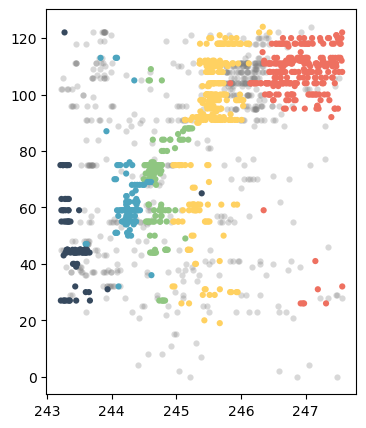

In [3]:
# Get the current working directory
f3_working_dir = os.getcwd()
f3_working_dir = '//'.join(f3_working_dir.split('\\')[0:-2]) + r'//data/f3//'

PP_PATH = f3_working_dir + 'ppseq_output_awake\\'
dat_path = f3_working_dir + 'example_mouse_data\\'
        
file = find_example_file(PP_PATH)
        
# set tracking path
for file_ in os.listdir(dat_path + r"\video\tracking\\"):
    if 'task' in file_:
        if not 'clock' in file_:
            tracking_path = os.path.join(dat_path + r"\video\tracking\\",file_) + '\\'

                    
data = Load_example_data(PP_PATH, file, tracking_path, dat_path)

### change the color ordering to standard color ordering: 
# recolor and save these plots out
current_color_order = [purple, blue, red, gold, yellow, green]
colors = ['---',red,green,yellow,blue,purple,gold,dark_blue]
# ## recolor based on current and desired color order
new_order_inds = [0]
for item in current_color_order:
    new_order_inds += [np.where(np.array(colors) == item)[0][0]]
# apply this ordering
new_colors = colors.copy()
for i,index in enumerate(new_order_inds):
    colors[index] = new_colors[i]                          
# determine new ordering based on this as well
ordering = list((np.array(new_order_inds)-1)[np.array(new_order_inds)-1 >=0])
#swap last 'extra' seq down to the bottom 
ordering = [ordering[-1]] + ordering[0:-1]
print(ordering)

# plot zoomed example
plot_zoomed_example_raster(data,ordering,colors,timeframe = [243.2,247.57])

Text(0.5, 1.0, 'held sequences in colour and extra sequences + background in grey')

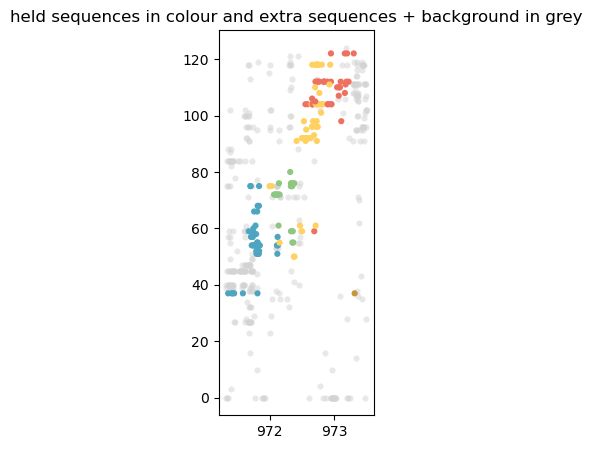

In [4]:
file_path = current_working_dir + 'example_replay_data.json'
with open(file_path, 'r') as file:
    example_sleep_data = json.load(file)

# example_sleep_spikes 
spikes_df = pd.read_csv(current_working_dir + 'example_replay_spikes.csv')

# caluclate interval timings and end points
interval_lengths =[]
for interval in example_sleep_data['behav_time_interval_start']:
    interval_lengths+= [np.diff(interval)[0]]
total_time = sum(interval_lengths)
interval_end_points = np.cumsum(interval_lengths)



# 10

timeframe = [971.3,973.5]



mask = (spikes_df.timestamp>timeframe[0])*(spikes_df.timestamp<timeframe[-1])
## neuron order:

#define neuron order
neuron_permute_loc = np.zeros(len(example_sleep_data["neuron_index"]))
for i in range(len(example_sleep_data["neuron_index"])):
    neuron_permute_loc[i] = int(list(example_sleep_data["neuron_index"]).index(i))
neuron_order = neuron_permute_loc[(spikes_df.neuron-1).astype(int)]


## plotting:

fig, ax = plt.subplots(1, 1,figsize=(2, 5))



# plot background in grey 
background_keep_mask = []
for item in spikes_df[mask].sequence_type_adjusted:
    if item < 0 or item >= 7.0:
        background_keep_mask.append(True)
    else:
        background_keep_mask.append(False)
background_keep_mask = np.array(background_keep_mask)
ax.scatter(spikes_df[mask][background_keep_mask].timestamp, neuron_order[mask][background_keep_mask],marker = 'o', s=20, linewidth=0,color = 'lightgrey' ,alpha=0.5)

# plot spikes without background
background_remove_mask = spikes_df[mask].sequence_type_adjusted >= 0
background_remove_mask = (spikes_df[mask].sequence_type_adjusted >= 0)*(spikes_df[mask].sequence_type_adjusted != 7.0)*(spikes_df[mask].sequence_type_adjusted != 8.0)
c_ = np.array(colors)[spikes_df[mask][background_remove_mask].sequence_type_adjusted.values.astype(int)]
# ## faster:
ax.scatter(spikes_df[mask][background_remove_mask].timestamp, neuron_order[mask][background_remove_mask],marker = 'o', s=20, linewidth=0,color = c_ ,alpha=1)
ax.set_title('held sequences in colour and extra sequences + background in grey')

FIGURE 4D

C:\Users\Emmett\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Emmett\anaconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


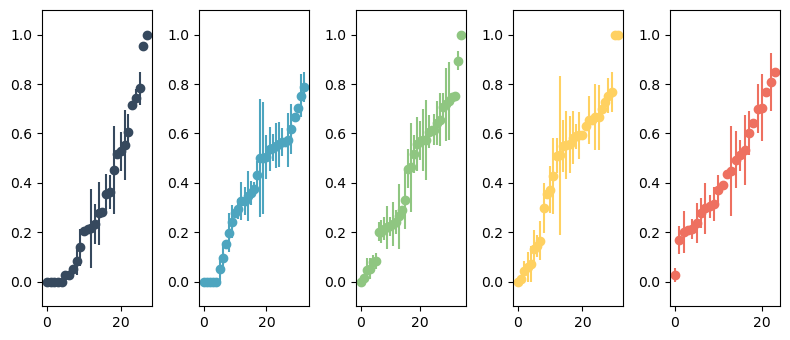

In [5]:
replay_motif_data= pd.read_csv('Z:\\projects\\sequence_squad\\organised_data\\ppseq_data\\finalised_output\\striatum\\paper_submission\\post_sleep\\\\178_1_7_run_1207023_1350\\\\_final_analysis_output\\chunk3_13300to14300\\temporal_structure_analysis\\replay_motif_data_updated.csv')


# filter for sequentially forward replay
sequential_replay_motif_data = replay_motif_data[replay_motif_data.catagory == 'forward']
sequential_replay_motif_data = sequential_replay_motif_data.reset_index(drop = True)

forward_neuron_spike_positions_all_seqs = []
for i in range(1,7):
    forward_neuron_spike_positions_all_seqs += [determine_neuron_spike_pos(sequential_replay_motif_data,i)]

fig, axs = plt.subplots(1,5, figsize=(8,3.5))
ordering = [4,3,0,5,2]
for i, ax in enumerate(axs):
    idx = ordering[i]
    neuron_spike_positions = forward_neuron_spike_positions_all_seqs[idx]
    if len(neuron_spike_positions) > 1:
        means = []
        std_devs = []
        neurs = []
        for neuron in neuron_spike_positions:
            neurs+=[neuron]
            means+=[np.mean(neuron_spike_positions[neuron])]
            std_devs+=[scipy.stats.sem(neuron_spike_positions[neuron])]

        #Sort means and std_devs together based on means
        sorted_data = sorted(zip(means, std_devs))
        sorted_means, sorted_std_devs = zip(*sorted_data)

    #Plot means with error bars
    ax.errorbar(range(len(means)), sorted_means, yerr=sorted_std_devs, fmt='o', capsize=0, color = colors[idx+1])
    ax.set_ylim(-0.1,1.1)
    
fig.tight_layout()


## reverse: 

# # only take sequential replay
# sequential_replay_motif_data = replay_motif_data[replay_motif_data.catagory == 'reverse']
# sequential_replay_motif_data = sequential_replay_motif_data.reset_index(drop = True)

# reverse_neuron_spike_positions_all_seqs = []
# for i in range(1,7):
#     reverse_neuron_spike_positions_all_seqs += [determine_neuron_spike_pos(sequential_replay_motif_data,i)]

# fig, axs = plt.subplots(1,5, figsize=(8,3.5))

# for i, ax in enumerate(axs):
#     idx = ordering[i]
#     neuron_spike_positions = reverse_neuron_spike_positions_all_seqs[idx]
#     if len(neuron_spike_positions) > 1:
#         means = []
#         std_devs = []
#         neurs = []

#         for neuron in neuron_spike_positions:
#             neurs+=[neuron]
#             means+=[np.mean(neuron_spike_positions[neuron])]
#             std_devs+=[scipy.stats.sem(neuron_spike_positions[neuron])]

#         #Sort means and std_devs together based on means
#         sorted_data = sorted(zip(means, std_devs))
#         sorted_means, sorted_std_devs = zip(*sorted_data)

#     #Plot means with error bars
#     ax.errorbar(range(len(means)), sorted_means, yerr=sorted_std_devs, fmt='o', capsize=0, color = colors[i+1])
#     ax.invert_xaxis()

#     #Add labels and title
# #     ax.set_ylabel('Mean relative position in replay')

# fig.tight_layout()


FIGURE 4E

In [6]:
dat_path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\finalised_output\striatum\paper_submission\post_sleep\\"
ignore_list = ['269_1_5','269_1_6','270_1_1','178_2_3']
analysis_folder = r'\\_final_analysis_output\\'

sleep_time_point_df = pd.read_csv(dat_path + 'sleep_time_points.csv')

expert_mice = sleep_time_point_df[sleep_time_point_df.group == 'expert'].mir.values
hlesion_mice = sleep_time_point_df[sleep_time_point_df.group == 'h_lesion'].mir.values
learning_mice = sleep_time_point_df[sleep_time_point_df.group == 'learning'].mir.values


neuron_rel_awake_positions_reverse = []
neuron_rel_reverse_replay_positions = []

neuron_rel_awake_positions_forwards = []
neuron_rel_forward_replay_positions = []

expert_bool = []
hlesion_bool = []
learning_bool = []

for run_index,pp_file in enumerate(os.listdir(dat_path)):
    print(run_index)
    if not 'sleep_time_points' in pp_file:
        mouse = '_'.join(pp_file.split('_')[0:3])
        if not mouse in ignore_list:
            if mouse in list(expert_mice) + list(hlesion_mice) + list(learning_mice):
                current_mouse_path = dat_path + pp_file + analysis_folder
                for file in os.listdir(current_mouse_path):
                    mouse_neuron_rel_awake_positions_reverse = []
                    mouse_neuron_rel_reverse_replay_positions = []
                    mouse_neuron_rel_awake_positions_forwards = []
                    mouse_neuron_rel_forward_replay_positions = []
                    if 'chunk' in file:
                        print(mouse)
                        current_data_path = current_mouse_path + '\\' + file + '\\'

                        current_data_path_temporal_structre = current_data_path + 'temporal_structure_analysis\\'

                        mouse_neuron_rel_awake_positions_reverse += list(np.load(current_data_path_temporal_structre + 'neuron_rel_awake_positions_reverse.npy'))
                        mouse_neuron_rel_reverse_replay_positions += list(np.load(current_data_path_temporal_structre + 'neuron_rel_reverse_replay_positions.npy'))
                        mouse_neuron_rel_awake_positions_forwards += list(np.load(current_data_path_temporal_structre + 'neuron_rel_awake_positions_forwards.npy'))
                        mouse_neuron_rel_forward_replay_positions += list(np.load(current_data_path_temporal_structre + 'neuron_rel_forward_replay_positions.npy'))
                        
                    if mouse in expert_mice:
                        expert_bool += [1]
                    else:
                        expert_bool +=[0]
                    if mouse in hlesion_mice:
                        hlesion_bool += [1]
                    else:
                        hlesion_bool +=[0]
                    if mouse in learning_mice:
                        learning_bool += [1]
                    else:
                        learning_bool +=[0]
                            
                    neuron_rel_awake_positions_reverse += [mouse_neuron_rel_awake_positions_reverse]
                    neuron_rel_reverse_replay_positions += [mouse_neuron_rel_reverse_replay_positions]
                    neuron_rel_awake_positions_forwards += [mouse_neuron_rel_awake_positions_forwards]
                    neuron_rel_forward_replay_positions += [mouse_neuron_rel_forward_replay_positions]

0
136_1_3
136_1_3
136_1_3
1
136_1_4
136_1_4
136_1_4
2
148_2_2
148_2_2
148_2_2
3
149_1_1
149_1_1
149_1_1
4
178_1_4
178_1_4
178_1_4
5
178_1_5
178_1_5
178_1_5
6
178_1_6
178_1_6
178_1_6
7
178_1_7
178_1_7
178_1_7
8
178_1_8
178_1_8
178_1_8
9
178_1_9
178_1_9
178_1_9
10
178_2_1
178_2_1
178_2_1
11
178_2_2
178_2_2
178_2_2
12
13
178_2_4
178_2_4
178_2_4
178_2_4
14
15
16
17
255_1_1
255_1_1
255_1_1
18
255_1_2
255_1_2
255_1_2
19
255_1_4
255_1_4
255_1_4
20
256_1_1
256_1_1
256_1_1
21
262_1_1
262_1_1
262_1_1
22
262_1_2
262_1_2
262_1_2
23
262_1_4
262_1_4
262_1_4
24
262_1_5
262_1_5
262_1_5
25
262_1_6
262_1_6
262_1_6
26
268_1_2
268_1_2
268_1_2
27
269_1_1
269_1_1
269_1_1
28
269_1_2
269_1_2
269_1_2
29
269_1_3
269_1_3
269_1_3
30
269_1_4
269_1_4
269_1_4
31
32
33
269_1_7
269_1_7
269_1_7
34
35
270_1_3
270_1_3
270_1_3
36
270_1_5
270_1_5
270_1_5
37
270_1_6
270_1_6
270_1_6
38


C:\Users\Emmett\AppData\Local\Temp\ipykernel_21488\2328018234.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(neuron_rel_forward_replay_positions)[np.array(bool_) == 1]
C:\Users\Emmett\AppData\Local\Temp\ipykernel_21488\2328018234.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(neuron_rel_awake_positions_forwards)[np.array(bool_) == 1]


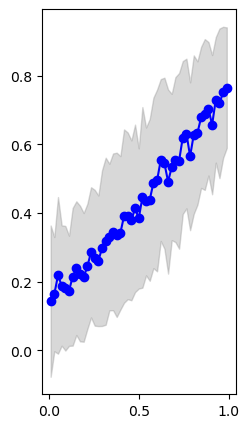

In [7]:
import numpy as np
import pandas as pd

bool_ = expert_bool

# Example XY scatter data (replace this with your actual data)
x = np.array(neuron_rel_forward_replay_positions)[np.array(bool_) == 1]
x = [item for sublist in x for item in sublist]
y = np.array(neuron_rel_awake_positions_forwards)[np.array(bool_) == 1]
y = [item for sublist in y for item in sublist]

# Create a pandas DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Define bin edges for y-values
bin_edges = np.linspace(0, 1, num=50)  # 5 bins from 0 to 1

# Bin the data based on y-values
df['bin'] = pd.cut(df['y'], bins=bin_edges)

# Calculate the middle points of the bins
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate the mean and standard deviation of each bin
bin_means = df.groupby('bin')['x'].mean()
bin_std = df.groupby('bin')['x'].std()

# Plot
fig, ax = plt.subplots(1, 1,figsize=(2.5, 5))
ax.plot(bin_midpoints,bin_means,'o-', c = 'blue')
# plt.plot(bin_midpoints, bin_means, width=0.1, align='center', label='Mean')

# Fill between mean line +- standard deviation
plt.fill_between(bin_midpoints, bin_means - bin_std, bin_means + bin_std, color='gray', alpha=0.3)

FIGURE 4F

Text(0.5, 1.0, 'held sequences in colour and extra sequences + background in grey')

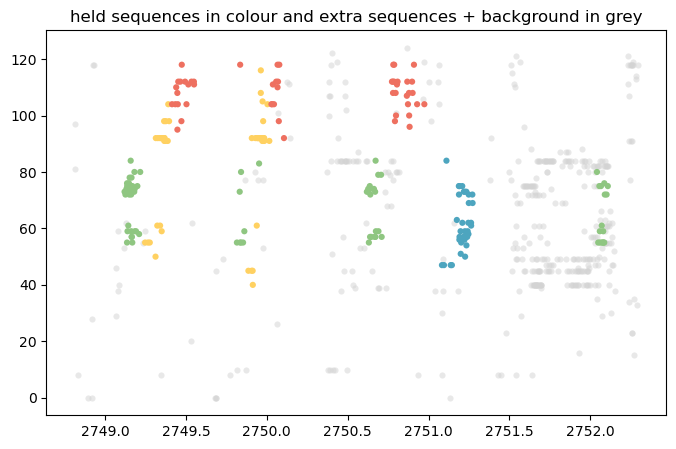

In [8]:
file_path = current_working_dir + 'example_replay_data.json'
with open(file_path, 'r') as file:
    example_sleep_data = json.load(file)

# example_sleep_spikes 
spikes_df = pd.read_csv(current_working_dir + 'example_replay_spikes.csv')

# caluclate interval timings and end points
interval_lengths =[]
for interval in example_sleep_data['behav_time_interval_start']:
    interval_lengths+= [np.diff(interval)[0]]
total_time = sum(interval_lengths)
interval_end_points = np.cumsum(interval_lengths)



# 10

timeframe = [2748.8,2752.3]



mask = (spikes_df.timestamp>timeframe[0])*(spikes_df.timestamp<timeframe[-1])
## neuron order:

#define neuron order
neuron_permute_loc = np.zeros(len(example_sleep_data["neuron_index"]))
for i in range(len(example_sleep_data["neuron_index"])):
    neuron_permute_loc[i] = int(list(example_sleep_data["neuron_index"]).index(i))
neuron_order = neuron_permute_loc[(spikes_df.neuron-1).astype(int)]


## plotting:

fig, ax = plt.subplots(1, 1,figsize=(8, 5))


# plot background in grey 
background_keep_mask = []
for item in spikes_df[mask].sequence_type_adjusted:
    if item < 0 or item >= 7.0:
        background_keep_mask.append(True)
    else:
        background_keep_mask.append(False)
background_keep_mask = np.array(background_keep_mask)
ax.scatter(spikes_df[mask][background_keep_mask].timestamp, neuron_order[mask][background_keep_mask],marker = 'o', s=20, linewidth=0,color = 'lightgrey' ,alpha=0.5)

# plot spikes without background
background_remove_mask = spikes_df[mask].sequence_type_adjusted >= 0
background_remove_mask = (spikes_df[mask].sequence_type_adjusted >= 0)*(spikes_df[mask].sequence_type_adjusted != 7.0)*(spikes_df[mask].sequence_type_adjusted != 8.0)
c_ = np.array(colors)[spikes_df[mask][background_remove_mask].sequence_type_adjusted.values.astype(int)]
# ## faster:
ax.scatter(spikes_df[mask][background_remove_mask].timestamp, neuron_order[mask][background_remove_mask],marker = 'o', s=20, linewidth=0,color = c_ ,alpha=1)
ax.set_title('held sequences in colour and extra sequences + background in grey')

FIGURE 4G

2
3
6
4
5


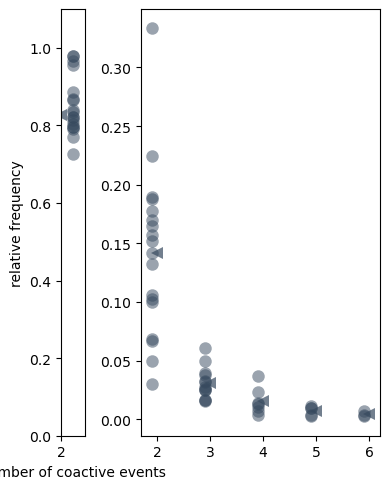

In [9]:
file_path = current_working_dir + 'all_recordings_replay_feature_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)
    
e_coactive_freqs_counts = data['e_coactive_freqs_counts']

# plot frequency of coactive events (1,2,3,4,etc.)

fig, [ax,ax2]= plt.subplots(1, 2,figsize=(4, 5),gridspec_kw={'width_ratios': [1, 10]})

means = []
stds = []
x_ = []
for item in e_coactive_freqs_counts:
    ax.plot(np.ones(len(e_coactive_freqs_counts['1']))*(1),e_coactive_freqs_counts['1'],'o', c = red, alpha = 0.5, markeredgewidth = 0, markersize = 9)
    x_ += [item]
    means += [np.median(e_coactive_freqs_counts['1'])]
    stds += [np.std(e_coactive_freqs_counts['1'])]
    break
    
means = np.array(means)[np.argsort(x_)]
stds = np.array(stds)[np.argsort(x_)]
x_ = np.array(x_)[np.argsort(x_)]

ax.plot(x_[0],means[0],'<', color = red,alpha = 0.7, markeredgewidth = 0, markersize = 9)
ax.set_xlim(0,2)
    
upper = means + stds
lower = means - stds
ax.fill_between(x_,(lower),(upper),
    alpha=0.2, edgecolor='None', facecolor='red',
    linewidth=1, linestyle='dashdot', antialiased=True)

ax.set_xlabel('number of coactive events')
ax.set_ylabel('relative frequency')

ax.set_ylim(0,1.1)


means = []
stds = []
x_ = []
for item in e_coactive_freqs_counts:
    if not item == '1':
        print(item)
        ax2.plot(np.ones(len(e_coactive_freqs_counts[item]))*(float(item)-0.1),e_coactive_freqs_counts[item],'o', c = red, alpha = 0.5, markeredgewidth = 0, markersize = 9)
        x_ += [float(item)]
        means += [np.mean(e_coactive_freqs_counts[item])]
        stds += [np.std(e_coactive_freqs_counts[item])]
    
means = np.array(means)[np.argsort(x_)]
stds = np.array(stds)[np.argsort(x_)]
x_ = np.array(x_)[np.argsort(x_)]

ax2.plot(x_,means,'<', color = red,alpha = 0.7, markeredgewidth = 0, markersize = 8)


plt.tight_layout()

In [10]:
### stats

# Input parameters
rate_per_second = np.mean(data['reactivations_per_min'])/60
event_length_s = np.nanmean([item for sublist in data['task_nontask_e_len'] for item in sublist])

# Calculate probabilities and percentages
rate_per_0p3_seconds, results, percentages = calculate_probabilities(rate_per_second, event_length_s)

# Display results
print(f"Using a rate of {rate_per_0p3_seconds:.6f} events per 0.3 seconds.")
print("Probability of events co-occurring within 0.3 + mean event length:")
for k, probability in results.items():
    print(f"{k} events co-occurring: Probability {probability:.6f}, Percentage {percentages[k]:.2f}%")
    
    
# test each one for significance from expected

from scipy.stats import shapiro
from scipy.stats import ttest_1samp

expect_percentages= [6,0.93,0.26,0.01,0,0]
for i,key in enumerate(e_coactive_freqs_counts):
    data = np.array(e_coactive_freqs_counts[key])
    
    print('-------')
    print(key)

    ### all normal so use t test 
    
    # Hypothesized value (e.g., population mean or constant)
    hypothesized_value = expect_percentages[i]

    # Perform one-sample t-test
    statistic, p_value = ttest_1samp(data, hypothesized_value)

    # Print the test statistic and p-value
    print("Test statistic:", statistic)
    print("P-value:", p_value)

    

Using a rate of 0.128075 events per 0.3 seconds.
Probability of events co-occurring within 0.3 + mean event length:
1 events co-occurring: Probability 0.112679, Percentage 93.73%
2 events co-occurring: Probability 0.007216, Percentage 6.00%
3 events co-occurring: Probability 0.000308, Percentage 0.26%
4 events co-occurring: Probability 0.000010, Percentage 0.01%
5 events co-occurring: Probability 0.000000, Percentage 0.00%
6 events co-occurring: Probability 0.000000, Percentage 0.00%
-------
2
Test statistic: -346.3827019760155
P-value: 3.6829651475589186e-34
-------
1
Test statistic: -4.488109138942195
P-value: 0.0003238847478115092
-------
3
Test statistic: -61.617335206035285
P-value: 2.2096774578879482e-16
-------
6
Test statistic: -4.169559543048749
P-value: 0.05298962471869765
-------
4
Test statistic: 3.5759627626015815
P-value: 0.011699832082098901
-------
5
Test statistic: 4.017840009916196
P-value: 0.015892861525981617


FIGURE 4H

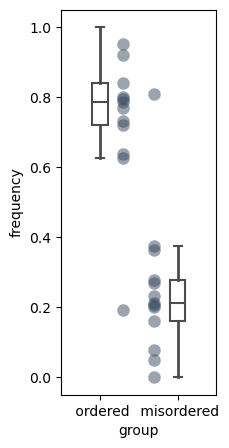

In [11]:
file_path = current_working_dir + 'all_recordings_replay_feature_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)

ordered_misordered_bdown =[]
for item in data["mouse_summed_amounts"]:
    ordered_misordered_bdown += [list(np.array(item[0:4])/sum(item[0:4]))]
    
e_ordered = []
e_misordered = []
hl_ordered = []
hl_misordered = []
l_ordered = []
l_misordered = []
for index,item in enumerate(ordered_misordered_bdown):
    if len(item) > 0:
        if data["expert"][index] == 1:
            if index < 28:
                e_ordered += [sum(item[0:3])]
                e_misordered += [item[-1]]

fig, ax= plt.subplots(1, 1,figsize=(2, 5))

ax.plot(0.3*np.ones(len(e_ordered[0:-1])),e_ordered[0:-1], 'o', color = red, alpha = 0.5, markeredgewidth = 0, markersize = 9)
ax.plot(0.7*np.ones(len(e_misordered)),e_misordered, 'o', color = red, alpha = 0.5, markeredgewidth = 0, markersize = 9)
 
data = e_ordered+ e_misordered
groups = [' ordered'] * len(e_ordered) + [' misordered'] * len(e_misordered) 
plt_df = pd.DataFrame({'group':groups,'frequency': data })
ax=sns.boxplot( y = 'frequency', x = 'group', data = plt_df, color = 'blue', width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)


Observed Test Statistic: 0.5030318571514463
99 percentile: 0.2933294106535417
p-value: 1e-05


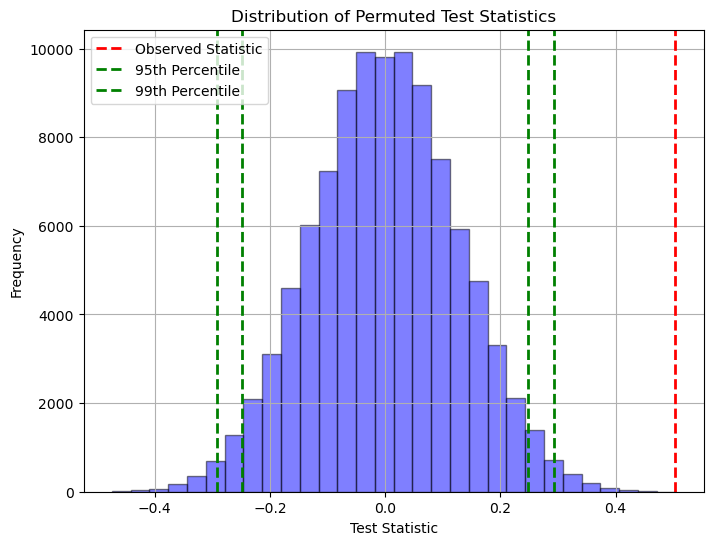

In [12]:
### STATS

list1 = e_ordered
list2 = e_misordered


# Define your test statistic function
def test_statistic(list1, list2):
    return np.mean(list1) - np.mean(list2)

# Compute the observed test statistic
observed_statistic = test_statistic(list1, list2)

# Combine the two lists
combined_data = list1 + list2

# Number of permutations
num_permutations = 100000

# Initialize an array to store the permuted test statistics
permuted_statistics = np.zeros(num_permutations)

# Permutation test
for i in range(num_permutations):
    # Shuffle the combined data
    np.random.shuffle(combined_data)
    
    # Split the shuffled data back into two lists
    permuted_list1 = combined_data[:len(list1)]
    permuted_list2 = combined_data[len(list1):]
    
    # Compute the test statistic for the permuted data
    permuted_statistics[i] = test_statistic(permuted_list1, permuted_list2)

# Calculate the p-value
p_value = np.mean(permuted_statistics >= observed_statistic)

print("Observed Test Statistic:", observed_statistic)
print("99 percentile:", np.percentile(permuted_statistics, 99))
print("p-value:", p_value)


plt.figure(figsize=(8, 6))
plt.hist(permuted_statistics, bins=30, alpha=0.5, color='blue', edgecolor='black')
plt.axvline(observed_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed Statistic')
plt.xlabel('Test Statistic')
plt.ylabel('Frequency')
plt.title('Distribution of Permuted Test Statistics')
plt.axvline(np.percentile(permuted_statistics, 97.5), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.axvline(np.percentile(permuted_statistics, 2.5), color='green', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(permuted_statistics, 99), color='green', linestyle='dashed', linewidth=2, label='99th Percentile')
plt.axvline(np.percentile(permuted_statistics, 1), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Test Statistic')
plt.legend()
plt.grid(True)
plt.show()

FIGURE 4J

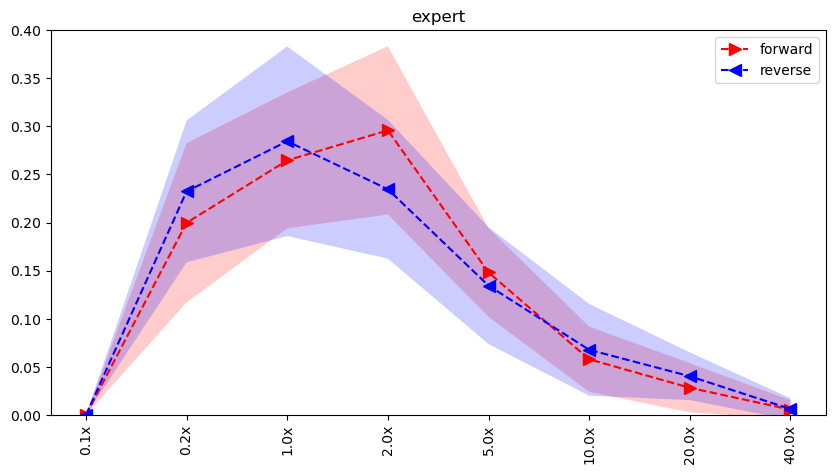

In [13]:
regression_df = pd.read_csv(current_working_dir + 'warps_df.csv')

bins_ = [0.1, 0.2, 1,2, 5, 10,20,40]

e_f_warp_factors = []
e_r_warp_factors = []
hl_f_warp_factors = []
hl_r_warp_factors = []
l_f_warp_factors = []
l_r_warp_factors = []

e_forward = []
e_reverse = []
hl_forward = []
hl_reverse = []
l_forward = []
l_reverse = []

ef_data = []
er_data = []
hlf_data = []
hlr_data = []
lf_data = []
lr_data = []

for mouse, group in regression_df.groupby('mouse'):
    if mouse in expert_mice:

        #forward:
        data = list(group.warp_factor.values[group.warp_factor.values > 0])
        ef_data += data
        closest_examples,example_totals = find_closest_example(data,bins_)
        e_f_warp_factors +=[list(example_totals.values())]
        e_forward += [sum(example_totals.values())]
        #reverse:
        data = list(abs(group.warp_factor.values[group.warp_factor.values < 0]))
        er_data += data
        closest_examples,example_totals = find_closest_example(data,bins_)
        e_r_warp_factors +=[list(example_totals.values())]
        e_reverse += [sum(example_totals.values())]
#     elif mouse in hlesion_mice:
#         print(mouse)
#         #forward:
#         data = list(group.warp_factor.values[group.warp_factor.values > 0])
#         hlf_data += data
#         closest_examples,example_totals = find_closest_example(data,bins_)
#         hl_f_warp_factors +=[list(example_totals.values())]
#         hl_forward += [sum(example_totals.values())]
#         #reverse:
#         data = list(abs(group.warp_factor.values[group.warp_factor.values < 0]))
#         hlr_data += data
#         closest_examples,example_totals = find_closest_example(data,bins_)
#         hl_r_warp_factors +=[list(example_totals.values())]
#         hl_reverse += [sum(example_totals.values())]
#     elif mouse in learning_mice:
#         print(mouse)
#         #forward:
#         data = list(group.warp_factor.values[group.warp_factor.values > 0])
#         lf_data += data
#         closest_examples,example_totals = find_closest_example(data,bins_)
#         l_f_warp_factors +=[list(example_totals.values())]
#         l_forward += [sum(example_totals.values())]
#         #reverse:
#         data = list(abs(group.warp_factor.values[group.warp_factor.values < 0]))
#         lr_data += data
#         closest_examples,example_totals = find_closest_example(data,bins_)
#         l_r_warp_factors +=[list(example_totals.values())]
#         l_reverse += [sum(example_totals.values())]
        
e_f_warp_factors = relative_warp_values(e_f_warp_factors)
e_r_warp_factors = relative_warp_values(e_r_warp_factors)
# hl_f_warp_factors = relative_warp_values(hl_f_warp_factors)
# hl_r_warp_factors = relative_warp_values(hl_r_warp_factors)
# l_f_warp_factors = relative_warp_values(l_f_warp_factors)
# l_r_warp_factors = relative_warp_values(l_r_warp_factors)

    
fig,ax = plt.subplots(1, 1,figsize=(10, 5))
e_data_f,e_data_r = plot_warps(e_f_warp_factors,e_r_warp_factors,ax,'expert',bins_)
# hl_data_f,hl_data_r = plot_warps(hl_f_warp_factors,hl_r_warp_factors,ax1,'h lesion')
# l_data_f,l_data_r = plot_warps(l_f_warp_factors,l_r_warp_factors,ax2,'learning')

In [14]:
# PERMANOVA forward vs reverse diff

from skbio.stats.distance import permanova, DistanceMatrix
from skbio import DistanceMatrix
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import DistanceMatrix
from skbio.stats.distance import permanova

grouping = ['control_forwards']*len(np.vstack(e_f_warp_factors)) + ['control_reverse']*len(np.vstack(e_r_warp_factors))

# data is stacked so that each row is a sample (animal) and each colum is a variable/test

pairwise_distances = pdist(np.asarray(e_f_warp_factors+e_r_warp_factors), metric='euclidean')
distance_matrix = squareform(pairwise_distances)
dm = DistanceMatrix(distance_matrix)

# Perform PERMANOVA
results = permanova(dm, grouping, permutations=10000)
print(results)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      34
number of groups                  2
test statistic             1.784774
p-value                    0.141986
number of permutations        10000
Name: PERMANOVA results, dtype: object


FIGURE 4K

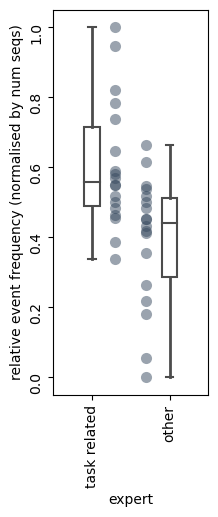

In [15]:
file_path = current_working_dir + 'all_recordings_replay_feature_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)

# seq proportions (task seqs vs others) - mean across all chunks
    
fig, ax= plt.subplots(1, 1,figsize=(2, 5))
e_rel_task_nontask = []
hl_rel_task_nontask = []
l_rel_task_nontask = []
for index,item in enumerate(data["rel_task_nontask"]):
    if data["expert"][index] == 1:
        e_rel_task_nontask += [item]
#     elif hlesion[index] == 1:
#         hl_rel_task_nontask += [item]
#     elif learning[index] == 1:
#         l_rel_task_nontask += [item]
    
for index,item in enumerate(e_rel_task_nontask):    
    ax.plot([0.3,0.7],item, 'o', color = red, alpha = 0.5, label='Data', markeredgewidth = 0, markersize = 8)
# for index,item in enumerate(hl_rel_task_nontask):    
#     ax.plot([2.3,2.7],item, 'o', color = blue, alpha = 0.5 , label='Data', markeredgewidth = 0, markersize = 8)
# for index,item in enumerate(l_rel_task_nontask):    
#     ax.plot([4.3,4.7],item, 'o', color = blue, alpha = 0.5 , label='Data', markeredgewidth = 0, markersize = 8)
    
data = conactinate_nth_items(e_rel_task_nontask)[0] + conactinate_nth_items(e_rel_task_nontask)[1] 
groups = (['task related'] * len(conactinate_nth_items(e_rel_task_nontask)[0])) + (['other'] * len(conactinate_nth_items(e_rel_task_nontask)[1]))
plt_df = pd.DataFrame({'expert':groups,'relative event frequency (normalised by num seqs)': data })
ax=sns.boxplot( y = 'relative event frequency (normalised by num seqs)', x = 'expert', data = plt_df, color = 'blue', width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)


labels = ['task related', 'other']
    
ax.set_xticks(range(0,len(labels)))
ax.set_xticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=10, rotation =90)


Observed Test Statistic: 0.2120150563576793
99 percentile: 0.1605222647489448
p-value: 0.0006


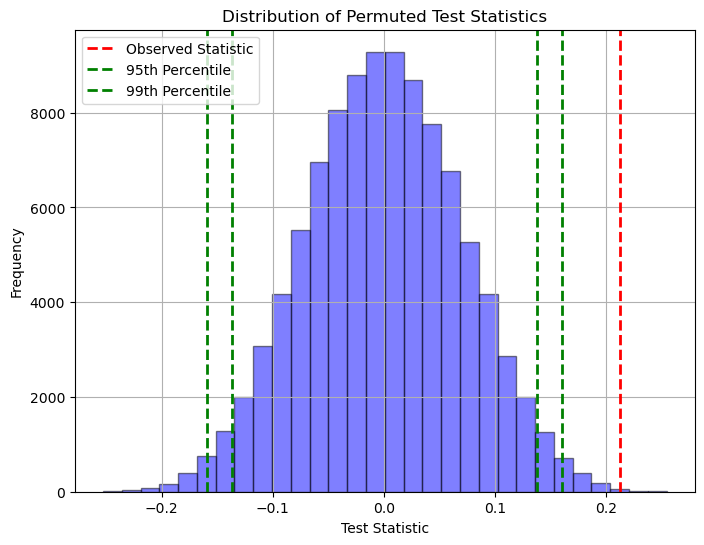

In [16]:
## stats

list1= [item[0] for item in e_rel_task_nontask]
list2= [item[1] for item in e_rel_task_nontask]

# Define your test statistic function
def test_statistic(list1, list2):
    return np.mean(list1) - np.mean(list2)

# Compute the observed test statistic
observed_statistic = test_statistic(list1, list2)

# Combine the two lists
combined_data = list1 + list2

# Number of permutations
num_permutations = 100000

# Initialize an array to store the permuted test statistics
permuted_statistics = np.zeros(num_permutations)

# Permutation test
for i in range(num_permutations):
    # Shuffle the combined data
    np.random.shuffle(combined_data)
    
    # Split the shuffled data back into two lists
    permuted_list1 = combined_data[:len(list1)]
    permuted_list2 = combined_data[len(list1):]
    
    # Compute the test statistic for the permuted data
    permuted_statistics[i] = test_statistic(permuted_list1, permuted_list2)

# Calculate the p-value
p_value = np.mean(permuted_statistics >= observed_statistic)

print("Observed Test Statistic:", observed_statistic)
print("99 percentile:", np.percentile(permuted_statistics, 99))
print("p-value:", p_value)

plt.figure(figsize=(8, 6))
plt.hist(permuted_statistics, bins=30, alpha=0.5, color='blue', edgecolor='black')
plt.axvline(observed_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed Statistic')
plt.xlabel('Test Statistic')
plt.ylabel('Frequency')
plt.title('Distribution of Permuted Test Statistics')
plt.axvline(np.percentile(permuted_statistics, 97.5), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.axvline(np.percentile(permuted_statistics, 2.5), color='green', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(permuted_statistics, 99), color='green', linestyle='dashed', linewidth=2, label='99th Percentile')
plt.axvline(np.percentile(permuted_statistics, 1), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Test Statistic')
plt.legend()
plt.grid(True)
plt.show()

FIGURE 4L

(0.0, 0.9)

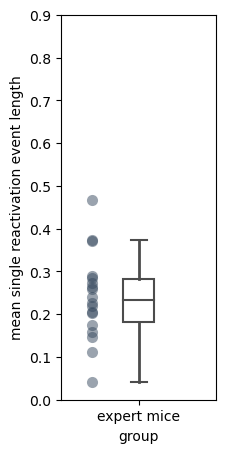

In [17]:
file_path = current_working_dir + 'all_recordings_replay_feature_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)

e_mean_lens = []
hl_mean_lens = [] 
l_mean_lens = [] 
for index,events in enumerate(data["event_lens"]):
    if data["expert"][index] == 1:
        e_mean_lens += [np.mean(events)]
#     elif hlesion[index] == 1:
#         hl_mean_lens += [np.mean(events)]
#     elif learning[index] == 1:
#         l_mean_lens += [np.mean(events)]
        
    

# Create figure and axes
fig, ax= plt.subplots(1, 1,figsize=(2, 5))

# Plot non shuffle data scatter plot
ax.plot(np.ones(len(e_mean_lens))*-0.3, e_mean_lens, 'o',color=red, alpha=0.5, label='Data', markeredgewidth = 0, markersize = 8)
# ax.plot(np.ones(len(hl_mean_lens))*0.7, hl_mean_lens, 'o',color=blue, alpha=0.5, label='Data',markeredgewidth = 0, markersize = 8)
# ax.plot(np.ones(len(l_mean_lens))*1.7, l_mean_lens, 'o',color=blue, alpha=0.5, label='Data',markeredgewidth = 0, markersize = 8)


plt_df = pd.DataFrame({'group':['expert mice']*len(e_mean_lens) + ['h lesion']*len(hl_mean_lens)+['early learning']*len(l_mean_lens),'mean single reactivation event length': e_mean_lens+hl_mean_lens+l_mean_lens })
ax=sns.boxplot( y = 'mean single reactivation event length', x = 'group', data = plt_df, color = 'blue', width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)

ax.set_ylim(0,0.9)


FIGURE 4M

Fitted parameters: a = 0.019298565713083783, b = 3.654956962764572
R-squared: 0.9889187059570987
p-values: [0.00027847822507531816, 7.999531015379091e-08]


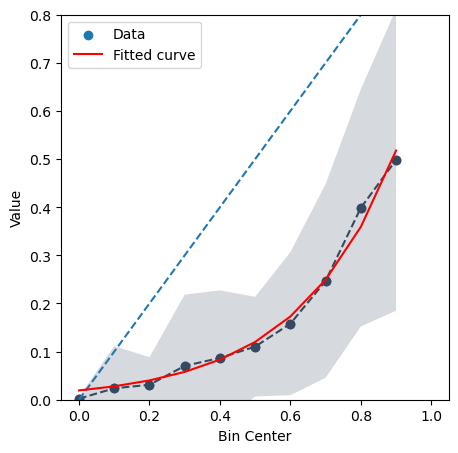

In [18]:
file_path = current_working_dir + 'sleep_neuron-involvement_by-seq_by-recording.json'

with open(file_path, 'r') as file:
    sleep_data = json.load(file)
    
file_path = current_working_dir + 'awake_neuron-involvement_by-seq_by-recording.json'

with open(file_path, 'r') as file:
    awake_data = json.load(file)

awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(awake_data,sleep_data)

fig, ax = plt.subplots(1, 1,figsize=(5, 5))
keys = []
e_means = []
sem = []
for key in awake_sleep_relationship:
    if len(awake_sleep_relationship[key]) > 0:
        keys += [key]
#         ax.plot([key]* len(e_awake_sleep_relationship[key]),e_awake_sleep_relationship[key],'o', color = 'red')
        e_means += [np.mean(awake_sleep_relationship[key])]
        sem += [scipy.stats.tstd(awake_sleep_relationship[key])]
ax.plot(sorted(keys),np.array(e_means)[np.argsort(keys)],'o--', c = red)

upper = np.array(e_means)[np.argsort(keys)] + sem
lower = np.array(e_means)[np.argsort(keys)] - sem
ax.fill_between(sorted(keys),(lower),(upper),
    alpha=0.2, edgecolor='None', facecolor=red,
    linewidth=1, linestyle='dashdot', antialiased=True)

x = np.linspace(0, 1, 10)  # Example x values
y = x  # Since x equals y, y values are the same as x values
plt.plot(x,y,'--')

ax.set_ylim(0,0.8)
ax.set_ylabel('replay proportion involvement')
ax.set_xlabel('awake proportion involvement')

#################################################

from scipy.optimize import curve_fit
from scipy.stats import t

# Extract the bins and corresponding values
bins = list(awake_sleep_relationship.keys())
bin_centers = np.array(bins)
values = np.array([np.mean(awake_sleep_relationship[bin]) for bin in bins])

# Define the exponential function
def exponential_model(x, a, b):
    return a * np.exp(b * x)

# Fit the model to the data
popt, pcov = curve_fit(exponential_model, bin_centers, values)

# Extract the fitting parameters
a, b = popt

# Calculate the fitted values
fitted_values = exponential_model(bin_centers, *popt)

# Calculate R-squared
residuals = values - fitted_values
ss_res = np.sum(residuals**2)
ss_tot = np.sum((values - np.mean(values))**2)
r_squared = 1 - (ss_res / ss_tot)

# Degrees of freedom
dof = max(0, len(bin_centers) - len(popt))

# Calculate standard errors of the parameters
perr = np.sqrt(np.diag(pcov))

# Calculate t-values for the parameters
t_values = popt / perr

# Calculate p-values for the parameters
p_values = [2 * (1 - t.cdf(np.abs(t_val), dof)) for t_val in t_values]

print(f'Fitted parameters: a = {a}, b = {b}')
print(f'R-squared: {r_squared}')
print(f'p-values: {p_values}')

# Plot the original data and the fitted curve
plt.scatter(bin_centers, values, label='Data')
plt.plot(bin_centers, fitted_values, label='Fitted curve', color='red')
plt.xlabel('Bin Center')
plt.ylabel('Value')
plt.legend()


FIGURE 4N

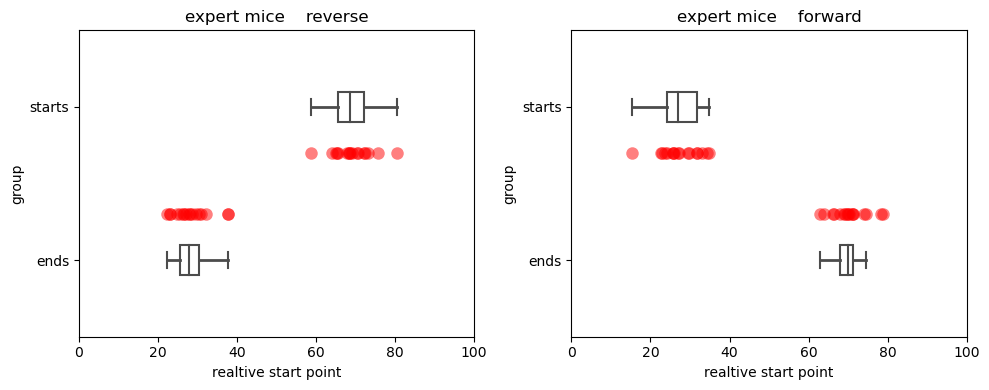

In [19]:
start_end_df = pd.read_csv(current_working_dir + "start_end_df.csv")

e_all_chunk_forward_start_mean = []
e_all_chunk_forward_end_mean = []
e_all_chunk_reverse_start_mean = []
e_all_chunk_reverse_end_mean = []
hl_all_chunk_forward_start_mean = []
hl_all_chunk_forward_end_mean = []
hl_all_chunk_reverse_start_mean = []
hl_all_chunk_reverse_end_mean = []
l_all_chunk_forward_start_mean = []
l_all_chunk_forward_end_mean = []
l_all_chunk_reverse_start_mean = []
l_all_chunk_reverse_end_mean = []
# s_o_d = []
for mouse,group in start_end_df.groupby('mouse'):
    chunk_forward_start_mean = []
    chunk_forward_end_mean = []
    chunk_reverse_start_mean = []
    chunk_reverse_end_mean = []
    for diff, chunk in group.groupby('sleep_onset_diff'):
        forward_chunk = chunk[chunk.label == 'forward']
        chunk_forward_start_mean += [np.mean(forward_chunk[forward_chunk.group == 'starts']['distances (%)'].values)]
        chunk_forward_end_mean += [np.mean(forward_chunk[forward_chunk.group == 'ends']['distances (%)'].values)]

        reverse_chunk = chunk[chunk.label == 'reverse']
        chunk_reverse_start_mean += [np.mean(reverse_chunk[reverse_chunk.group == 'starts']['distances (%)'].values)]
        chunk_reverse_end_mean += [np.mean(reverse_chunk[reverse_chunk.group == 'ends']['distances (%)'].values)]
        
    if mouse in expert_mice:
        e_all_chunk_forward_start_mean += [np.mean(chunk_forward_start_mean)]
        e_all_chunk_forward_end_mean += [np.mean(chunk_forward_end_mean)]
        e_all_chunk_reverse_start_mean += [np.mean(chunk_reverse_start_mean)]
        e_all_chunk_reverse_end_mean += [np.mean(chunk_reverse_end_mean)]

    
fig,[ax,ax2] = plt.subplots(1, 2,figsize=(10, 4))
    
plot_start_end_times(e_all_chunk_reverse_start_mean,e_all_chunk_forward_start_mean,e_all_chunk_reverse_end_mean,e_all_chunk_forward_end_mean,ax,ax2,'expert mice')

plt.tight_layout()


FIGURE 4O

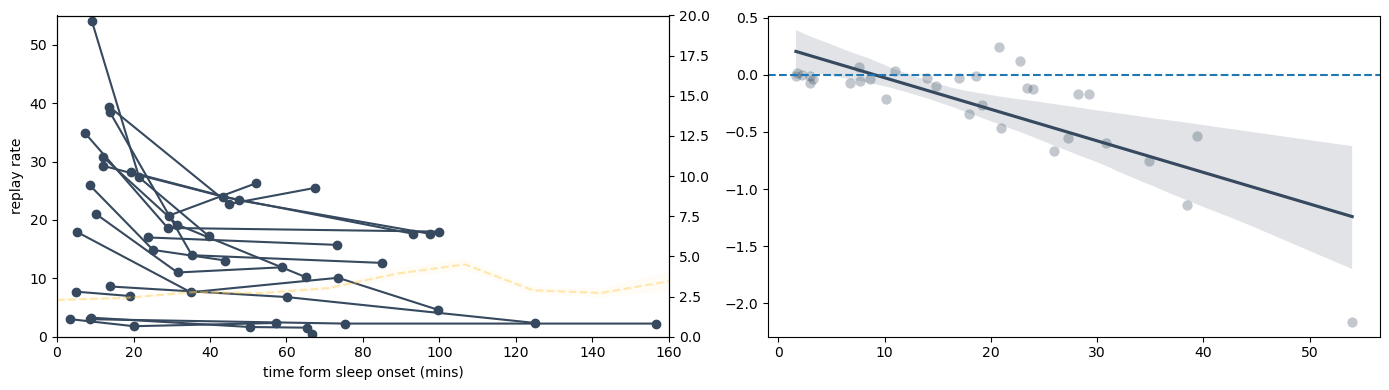

In [20]:
file_path = current_working_dir + 'all_recordings_replay_feature_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)

times = []
rates = []
x_ = []
y_ = []


fig, [ax,ax2] = plt.subplots(1, 2,figsize=(14, 4))
ax.set_ylabel('replay rate')
ax.set_xlabel('time form sleep onset (mins)')

# load in firing rate data for all neurons across all sessions
y = np.load(current_working_dir +"av-firing_rates.npy")
x = np.load(current_working_dir +"all-bin-mins.npy")
# re bin for plot
num_bins = 10
means,sems,bins,binned_x = bin_data(x,y,num_bins)
# Create a second y-axis for the second subplot
ax_2 = ax.twinx()    
ax_2.plot(bins,means,'--', c = blue,alpha = 0.5)
upper = np.array(means) + np.array(sems)
lower = np.array(means) - np.array(sems)
ax_2.fill_between(sorted(bins),(lower),(upper),
    alpha=0.05, edgecolor='None', facecolor=blue,
    linewidth=1, linestyle='dashdot', antialiased=True)
ax_2.set_ylim(0,20)




for i,item in enumerate(data["event_rate_binned"]):
    across_chunks_x = []
    across_chunks_y = []
    for e,chunk_item in enumerate(item):
        x = data["er_bins_relative_to_so"][i][e]
        y = chunk_item
        
#         if expert[i] == 1:
#             ax.plot(x,y, c = red, alpha = 0.1)
#         elif hlesion[i] == 1:
#             ax3.plot(x,y, c = blue, alpha = 0.1)  
#         elif learning[i] == 1:
#             ax5.plot(x,y, c = blue, alpha = 0.1)
            
        #mean for each time series across chunks
        across_chunks_x += [np.mean(data["er_bins_relative_to_so"][i][e])]
        across_chunks_y += [np.mean(chunk_item)]
        
    if data["expert"][i] == 1:
        ax.plot(across_chunks_x,across_chunks_y, '-o',c = red, alpha = 1)
        x_+=across_chunks_x
        y_+=across_chunks_y
    
    # save out stuff for plot 2
    rate_change_per_min = np.diff(across_chunks_y)/np.diff(across_chunks_x)
    if data["expert"][i] == 1:
        times += across_chunks_y[0:-1]
        rates += list(rate_change_per_min)

               
sns.regplot(x=times, y=rates, ax = ax2, color = red,scatter_kws={'s': 55, 'alpha': 0.3,'linewidths': 0})

ax2.axhline(0,0,ls ='--')


ax.set_ylim(0,55)
ax.set_xlim(0,160)
plt.tight_layout()




In [21]:
######################
## stats        
### effect of decay - significance
# Convert the data to a pandas DataFrame
data = pd.DataFrame({'x': across_chunks_x, 'y': across_chunks_y})
# Add a constant term to the independent variable
data = sm.add_constant(data)
# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']]).fit()
# Print the summary statistics
print(model.summary())

print('******************** PLOT 2 ***************************************')

### decay vs starting rate
# Convert the data to a pandas DataFrame
data = pd.DataFrame({'x': times, 'y': rates})
# Add a constant term to the independent variable
data = sm.add_constant(data)
# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']]).fit()
# Print the summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     2.318
Date:                Sun, 07 Jul 2024   Prob (F-statistic):              0.370
Time:                        12:08:37   Log-Likelihood:                0.66139
No. Observations:                   3   AIC:                             2.677
Df Residuals:                       1   BIC:                            0.8744
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8913      0.322      8.978      0.0

C:\Users\Emmett\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
